# Proyecto parte 1

# Importamos las librerías.

In [1]:
# Importamos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Leemos el archivo

In [2]:
# Leemos el archivo csv
df = pd.read_csv("IMDB-Movie-Data.csv", sep = ",")

# Vemos como vienen los datos del archivo

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Sacamos las tablas de frecuencias para las variables categóricas

In [4]:
# Tabla de frecuencias para la variable "Genre"
genre_frequency = df['Genre'].str.split(',', expand=True).stack().value_counts()
print("Frecuencia de Géneros:\n", genre_frequency)

Frecuencia de Géneros:
 Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: count, dtype: int64


In [5]:
# Tabla de frecuencia para la variable 'Director'
director_frequency = df['Director'].value_counts()
print("\nFrecuencia de Directores:\n", director_frequency)


Frecuencia de Directores:
 Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: count, Length: 644, dtype: int64


In [6]:
# Tabla de frecuencia para la variable 'Actors'
actors_frequency = df['Actors'].str.split(',', expand=True).stack().value_counts()
print("\nFrecuencia de Actores:\n", actors_frequency)



Frecuencia de Actores:
 Christian Bale         11
Mark Wahlberg          11
 Woody Harrelson        9
Jake Gyllenhaal         9
Matthew McConaughey     9
                       ..
Dominique Swain         1
 Lukas Hassel           1
Natasha Henstridge      1
 Pierre Coffin          1
Cheryl Hines            1
Name: count, Length: 2394, dtype: int64


In [7]:
# Tabla de frecuencia para la variable 'Title'
title_frequency = df['Title'].value_counts()
print("\nFrecuencia de Títulos:\n", title_frequency)


Frecuencia de Títulos:
 Title
The Host                   2
Guardians of the Galaxy    1
The Hurt Locker            1
The Daughter               1
Pineapple Express          1
                          ..
The Fault in Our Stars     1
Blended                    1
Fast & Furious             1
Looper                     1
Nine Lives                 1
Name: count, Length: 999, dtype: int64


# Empezamos hacer el EDA

In [8]:
# Vemos la forma de la tabla
df.shape

(1000, 12)

In [9]:
# Sacamos las Estadísticas. de la tabla
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [10]:
# Vemos los tipos de datos y el conteo del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [11]:
# Vemos si hay datos duplicados
df.duplicated().sum()

0

In [12]:
# Vemos si hay datos nulos
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

# Derivamos columnas
# Limpiamos el csv y lo ordenamos

In [13]:
# Esta función calcula el máximo número de categorías separadas por comas en una columna especificada de un dataframe
def max_categories_in_column(df, column_name):
    return df[column_name].str.split(',').apply(len).max()


In [14]:
# Vemos el máximo número de categorías separadas por comas en la columna 'Genre'
max_categories = max_categories_in_column(df, 'Genre')
print(max_categories)

# Vemos el máximo número de categorías separadas por comas en la columna 'Actors'
max_categories2 = max_categories_in_column(df, 'Actors')
print(max_categories2)


3
4


In [15]:
# Separamos las categorías en columnas nuevas separadas
genres_split = df['Genre'].str.split(',', expand=True)

# Asiganmos a cada columna un nombre
df['Genre1'] = genres_split[0].str.strip()
df['Genre2'] = genres_split[1].str.strip()
df['Genre3'] = genres_split[2].str.strip()


In [16]:
# Separamos las categorías en columnas nuevas separadas
actors_split = df['Actors'].str.split(',', expand=True)

# Asiganmos a cada columna un nombre
df['Actor1'] = actors_split[0].str.strip()  
df['Actor2'] = actors_split[1].str.strip()
df['Actor3'] = actors_split[2].str.strip()
df['Actor4'] = actors_split[3].str.strip()

In [17]:
# Creamos una lista con las columnas a eliminar
columns_to_remove = ['Actors', 'Genre', 'Genre_list', 'Actors_list']

# Eliminamos las columnas
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])



In [18]:
# Vemos la forma de la tabla nuevamente
df.head()


,Rank,Title,Description,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis


In [19]:
# Hace una copia de df
df_clean = df.copy()

# Llenamos los valores faltantes para las columnas numéricas con la mediana
df_clean['Revenue (Millions)'].fillna(df_clean['Revenue (Millions)'].median(), inplace=True)
df_clean['Metascore'].fillna(df_clean['Metascore'].median(), inplace=True)

# Llenamos los valores faltantes para las columnas categóricas con 'Unknown'
df_clean['Genre2'].fillna('Unknown', inplace=True)
df_clean['Genre3'].fillna('Unknown', inplace=True)
df_clean['Actor4'].fillna('Unknown', inplace=True)

# Vemos si hay datos duplicados
duplicates_df = df_clean.duplicated().sum()

# Si hay los eliminamos
if duplicates_df > 0:
    df.drop_duplicates(inplace=True)

# Verificamos los cambios implementados
clean_summary_df = {
    "Missing Values After Cleaning in df": df_clean.isnull().sum(),
    "Duplicates After Cleaning in df": df_clean.duplicated().sum()
}

# Mostramos el resultado
clean_summary_df



C:\Users\andre\AppData\Local\Temp\ipykernel_30904\2507627836.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Revenue (Millions)'].fillna(df_clean['Revenue (Millions)'].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_30904\2507627836.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

{'Missing Values After Cleaning in df': Rank                  0
 Title                 0
 Description           0
 Director              0
 Year                  0
 Runtime (Minutes)     0
 Rating                0
 Votes                 0
 Revenue (Millions)    0
 Metascore             0
 Genre1                0
 Genre2                0
 Genre3                0
 Actor1                0
 Actor2                0
 Actor3                0
 Actor4                0
 dtype: int64,
 'Duplicates After Cleaning in df': 0}

# Empezamos a sacar los gráficos

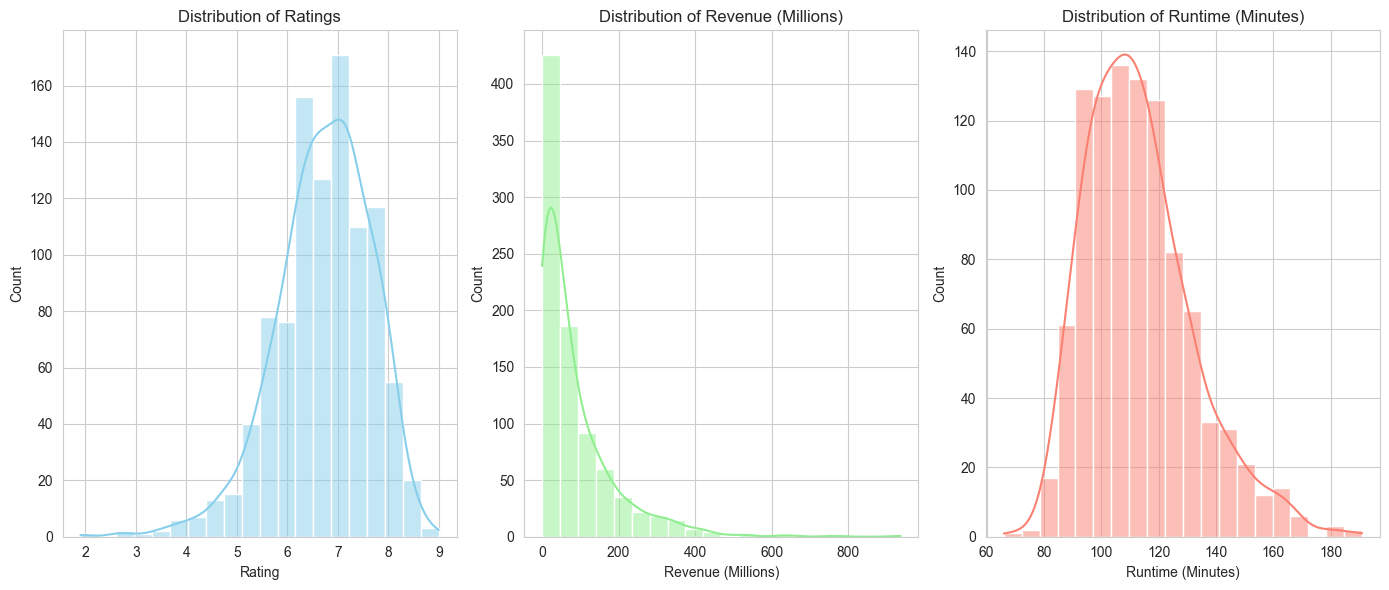

In [20]:
# Gráficos
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)

# Rating
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')

# Revenue 
plt.subplot(1, 3, 2)
sns.histplot(df['Revenue (Millions)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Revenue (Millions)')

# Runtime 
plt.subplot(1, 3, 3)
sns.histplot(df['Runtime (Minutes)'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Runtime (Minutes)')

plt.tight_layout()
plt.show()


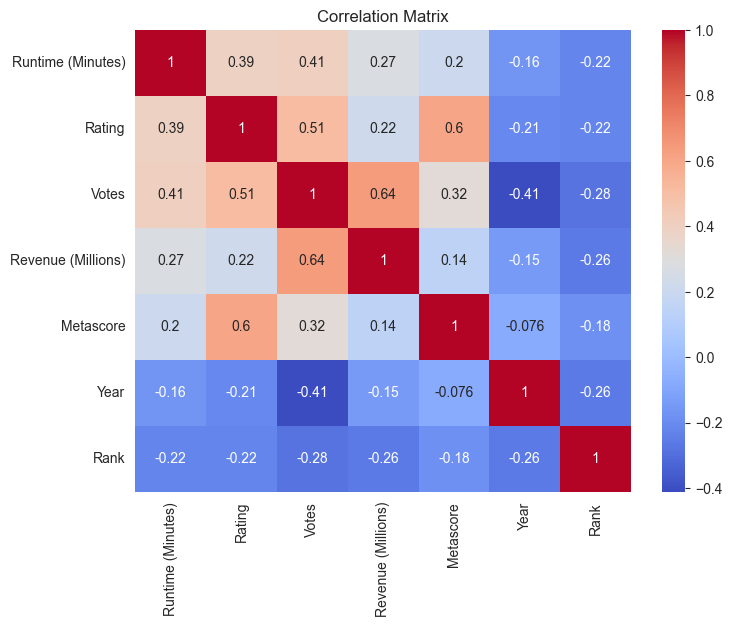

In [21]:
# Seleccionamos las columnas numéricas para el análisis
columns = ['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Year', 'Rank']

# Calculamos la matriz de correlación
correlation_matrix = df_clean[columns].corr()

# Creamos la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


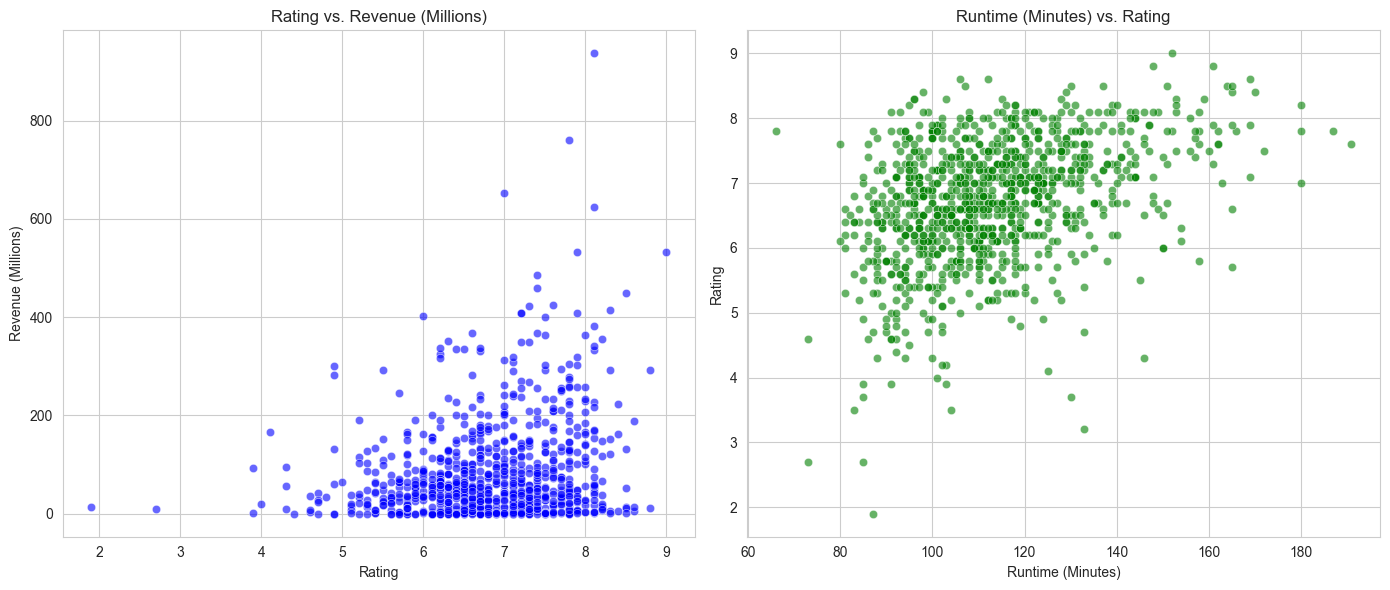

In [22]:
# Gráficos

# Rating vs. Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df, color='blue', alpha=0.6)
plt.title('Rating vs. Revenue (Millions)')

# Runtime vs. Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=df, color='green', alpha=0.6)
plt.title('Runtime (Minutes) vs. Rating')

plt.tight_layout()
plt.show()


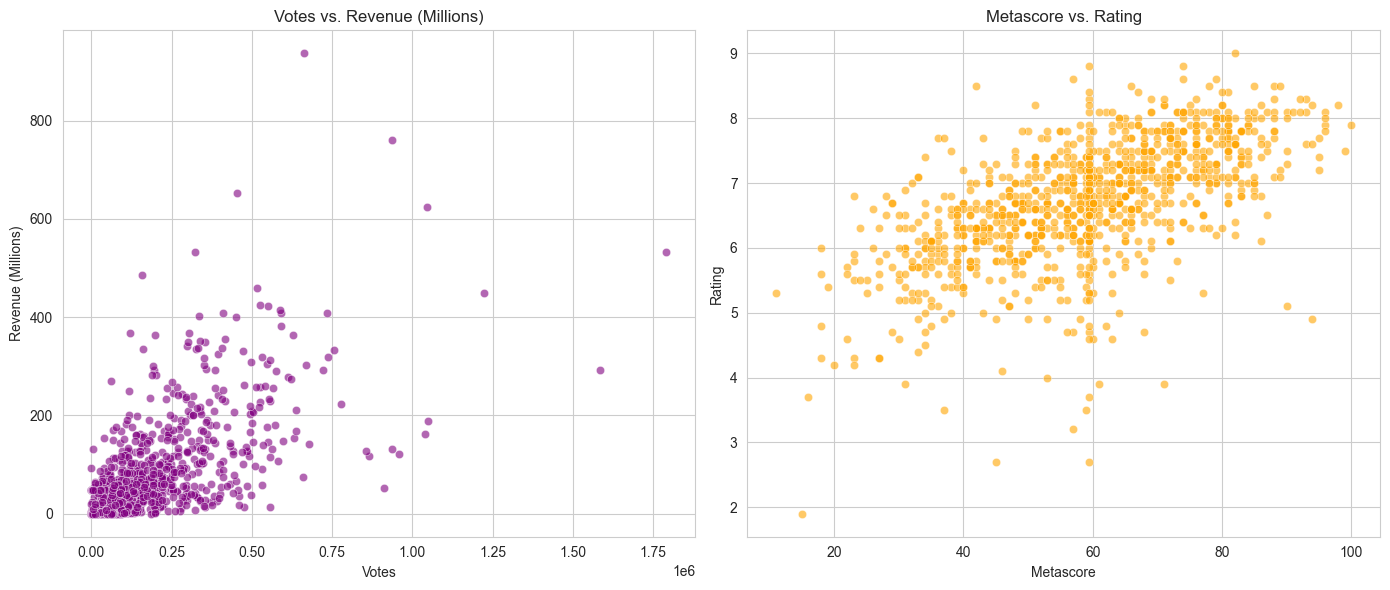

In [23]:
# gráficos
plt.figure(figsize=(14, 6))

# Votos vs. Ingresos (Revenue)
plt.subplot(1, 2, 1)
sns.scatterplot(x='Votes', y='Revenue (Millions)', data=df_clean, color='purple', alpha=0.6)
plt.title('Votes vs. Revenue (Millions)')

# Metascore vs. Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Metascore', y='Rating', data=df_clean, color='orange', alpha=0.6)
plt.title('Metascore vs. Rating')

plt.tight_layout()
plt.show()


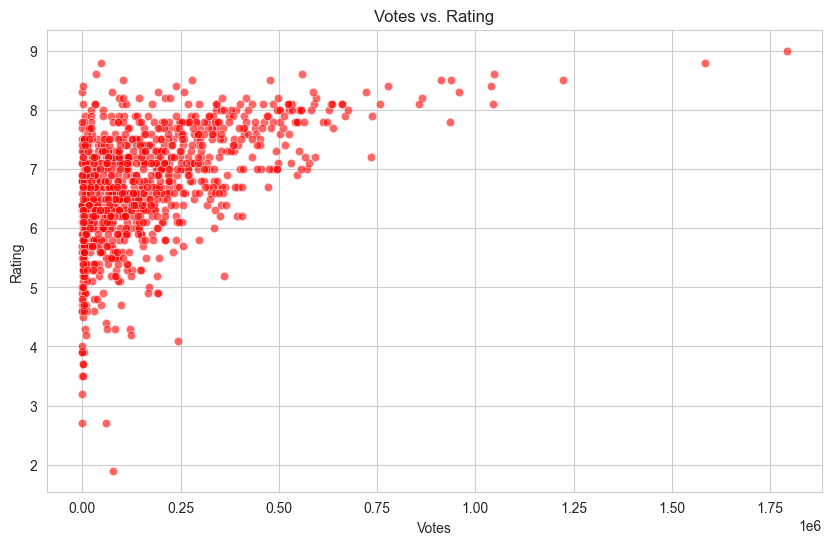

In [24]:
# Gráficos
plt.figure(figsize=(10, 6))

# Votos vs. Calificación (Rating)
sns.scatterplot(x='Votes', y='Rating', data=df_clean, color='red', alpha=0.6)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')

plt.show()

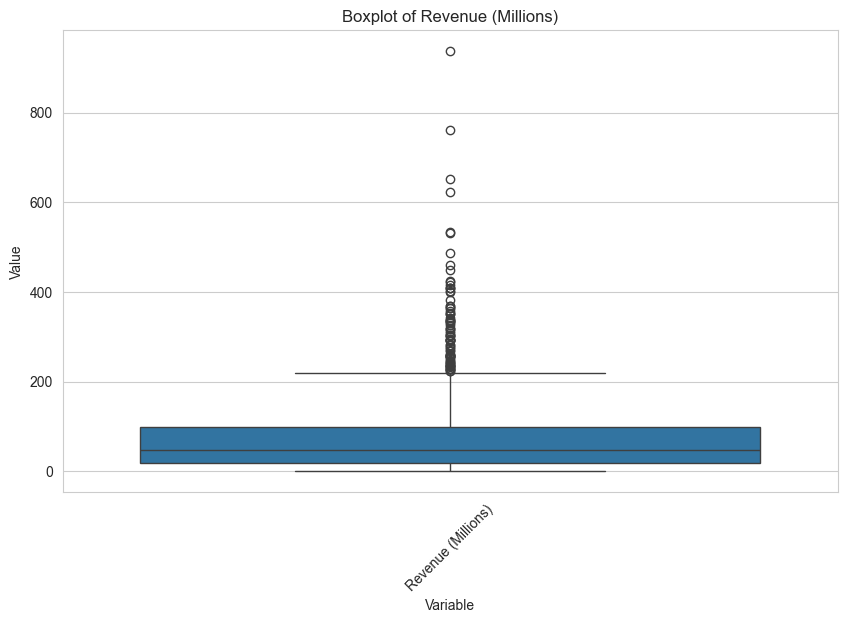

In [25]:
# Seleccionamos las columnas 
columns_to_plot = ['Revenue (Millions)']

# Ajustamos los datos para poder usar seaborn
df_melted = df_clean.melt(value_vars=columns_to_plot)

# Creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Revenue (Millions)')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

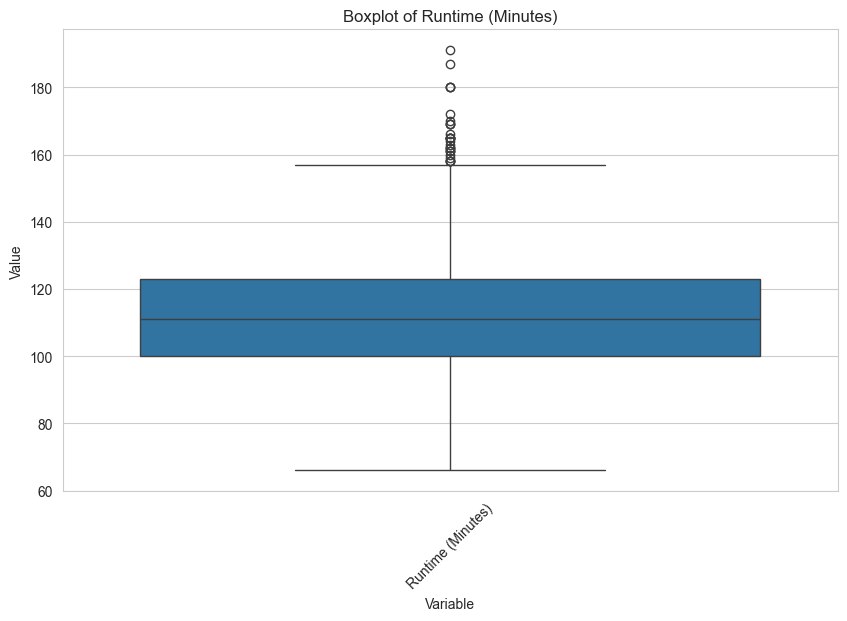

In [26]:
# Seleccionamos las columnas
columns_to_plot = ['Runtime (Minutes)']

# Ajustamos los datos para poder usar seaborn
df_melted = df_clean.melt(value_vars=columns_to_plot)

# Creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Runtime (Minutes)')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

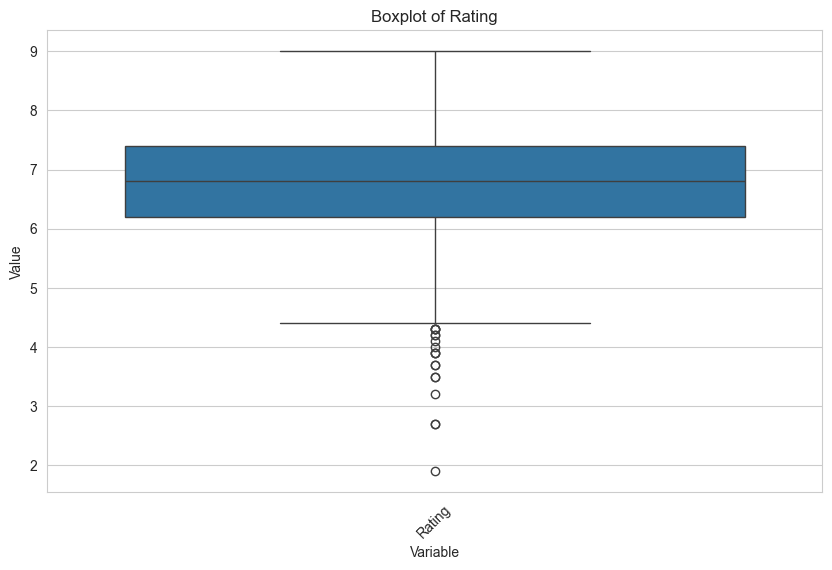

In [27]:
# Seleccionamos las columnas 
columns_to_plot = ['Rating']

# Ajustamos los datos para poder usar seaborn
df_melted = df_clean.melt(value_vars=columns_to_plot)

# Creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Rating')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.show()

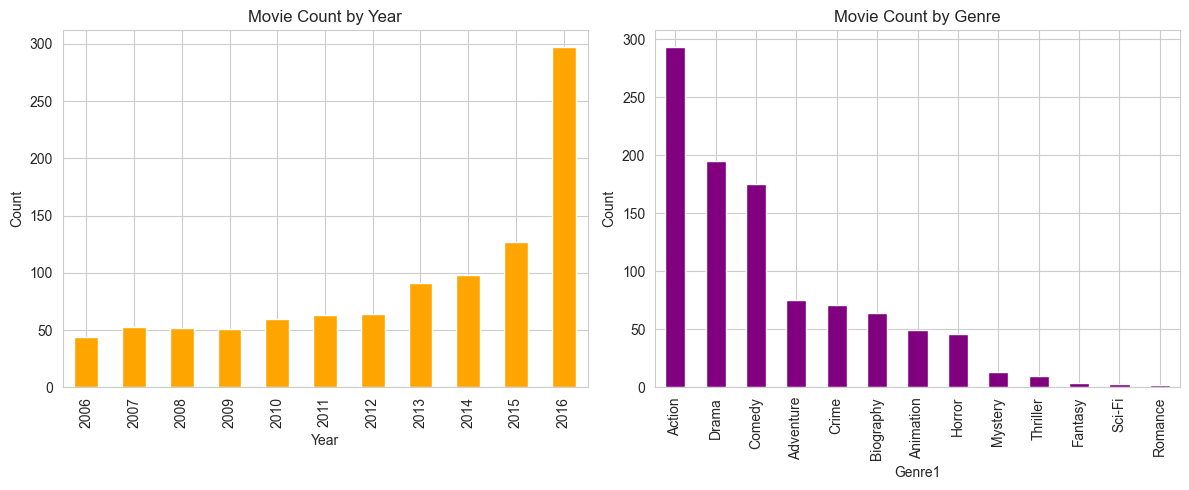

In [28]:
# Plotear
plt.figure(figsize=(12, 5))

# Plotear para Año
plt.subplot(1, 2, 1)
df_clean['Year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Movie Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Plotear para Género1
plt.subplot(1, 2, 2)
df_clean['Genre1'].value_counts().plot(kind='bar', color='purple')
plt.title('Movie Count by Genre')
plt.xlabel('Genre1')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



<Axes: title={'center': 'Proportion of Ratings'}, xlabel='Rating', ylabel='Proportion'>

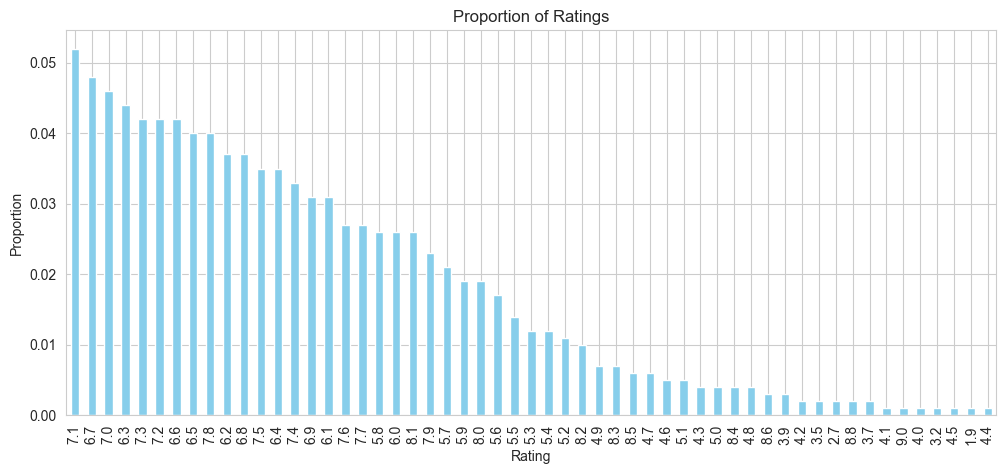

In [29]:
# Gráficos de proporciones
# Rating
plt.figure(figsize=(12, 5))
plt.title('Proportion of Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion')
rating_proportions = df_clean['Rating'].value_counts(normalize=True).sort_values(ascending=False)
rating_proportions.plot(kind='bar', color='skyblue')

<Axes: title={'center': 'Proportion of Metascore'}, xlabel='Metascore', ylabel='Proportion'>

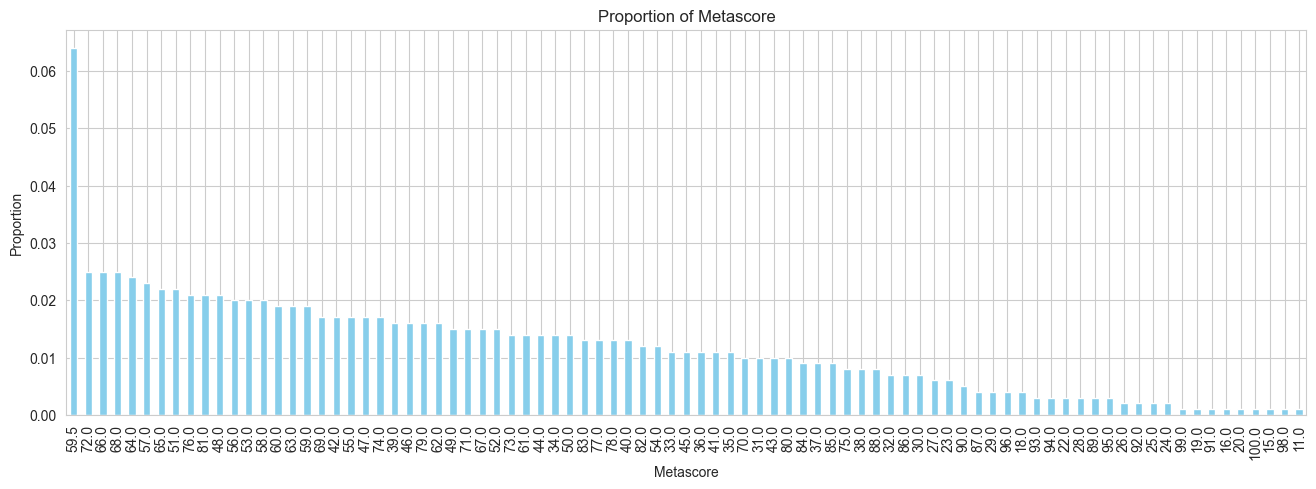

In [30]:
# Gráficos de proporciones
# METASCORE
plt.figure(figsize=(16, 5))
plt.title('Proportion of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Proportion')
metascore_proportion = df_clean['Metascore'].value_counts(normalize=True).sort_values(ascending=False)
metascore_proportion.plot(kind='bar', color='skyblue')

In [31]:
df_clean.head()

,Rank,Title,Description,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,Unknown,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis


# Aplicamos One-Hot Enconding 

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Agregar a una lista las columnas que son categóricas
categorical_cols = ['Director', 'Genre1', 'Genre2', 'Genre3', 'Actor1', 'Actor2', 'Actor3', 'Actor4', 'Title', 'Description']

# Crear el codificador
encoder = OneHotEncoder()

# Ajustar el codificador a las columnas categóricas
encoded_sparse_matrix = encoder.fit_transform(df_clean[categorical_cols])

# Convertir la matriz dispersa a una matriz densa
encoded_cols = encoded_sparse_matrix.toarray()

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Union de los DataFrames
df_clean_numeric = df_clean.drop(categorical_cols, axis=1)
df_clean_encoded = pd.concat([df_clean_numeric, encoded_df], axis=1)

# Ver las primeras filas del DataFrame Codificado
df_clean_encoded.head()



,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Aamir Khan,Director_Abdellatif Kechiche,Director_Adam Leon,...,"Description_With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.","Description_With the help of a German bounty hunter , a freed slave sets out to rescue his wife from a brutal Mississippi plantation owner.","Description_With the help of a mysterious pill that enables the user to access 100 percent of his brain abilities, a struggling writer becomes a financial wizard, but it also puts him in a new world with lots of dangers.",Description_With the help of his new friends Alex Danyliuk turns to a life of crime and identity theft.,"Description_With the world now aware of his identity as Iron Man, Tony Stark must contend with both his declining health and a vengeful mad man with ties to his father's legacy.","Description_With their warning about Lord Voldemort's return scoffed at, Harry and Dumbledore are targeted by the Wizard authorities as an authoritarian bureaucrat slowly seizes power at Hogwarts.","Description_Work causes a single mother to move to China with her young son; in his new home, the boy embraces kung fu, taught to him by a master.","Description_Years after a plague kills most of humanity and transforms the rest into monsters, the sole survivor in New York City struggles valiantly to find a cure.","Description_Young Ender Wiggin is recruited by the International Military to lead the fight against the Formics, a genocidal alien race which nearly annihilated the human race in a previous invasion.","Description_Young, up-and-coming martial artist, Bruce Lee, challenges legendary kung fu master Wong Jack Man to a no-holds-barred fight in Northern California."
0,1,2014,121,8.1,757074,333.13,76.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2012,124,7.0,485820,126.46,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,117,7.3,157606,138.12,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2016,108,7.2,60545,270.32,59.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2016,123,6.2,393727,325.02,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exportamos archivo 

In [33]:
# Exportar el archivo a csv ya con todas las variables codificadas
df_clean_encoded.to_csv('df_clean_encoded.csv', index=False)


In [34]:
df_clean_encoded.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Aamir Khan,Director_Abdellatif Kechiche,Director_Adam Leon,...,"Description_With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.","Description_With the help of a German bounty hunter , a freed slave sets out to rescue his wife from a brutal Mississippi plantation owner.","Description_With the help of a mysterious pill that enables the user to access 100 percent of his brain abilities, a struggling writer becomes a financial wizard, but it also puts him in a new world with lots of dangers.",Description_With the help of his new friends Alex Danyliuk turns to a life of crime and identity theft.,"Description_With the world now aware of his identity as Iron Man, Tony Stark must contend with both his declining health and a vengeful mad man with ties to his father's legacy.","Description_With their warning about Lord Voldemort's return scoffed at, Harry and Dumbledore are targeted by the Wizard authorities as an authoritarian bureaucrat slowly seizes power at Hogwarts.","Description_Work causes a single mother to move to China with her young son; in his new home, the boy embraces kung fu, taught to him by a master.","Description_Years after a plague kills most of humanity and transforms the rest into monsters, the sole survivor in New York City struggles valiantly to find a cure.","Description_Young Ender Wiggin is recruited by the International Military to lead the fight against the Formics, a genocidal alien race which nearly annihilated the human race in a previous invasion.","Description_Young, up-and-coming martial artist, Bruce Lee, challenges legendary kung fu master Wong Jack Man to a no-holds-barred fight in Northern California."
0,1,2014,121,8.1,757074,333.13,76.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2012,124,7.0,485820,126.46,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,117,7.3,157606,138.12,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2016,108,7.2,60545,270.32,59.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2016,123,6.2,393727,325.02,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Empezamos con los Clusters

In [35]:
wscc = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_clean_encoded) #Aplicamos KMeans a los datos
    wscc.append(kmeans.inertia_)

In [36]:
wscc

[35595799167376.984,
 13532791095214.73,
 7835193788490.21,
 4276399944235.683,
 2810499451875.7944,
 1942413180124.5662,
 1495291156914.0,
 1012184610262.3123,
 760880235412.0768,
 626163510426.0098]

Text(0, 0.5, 'WSCC')

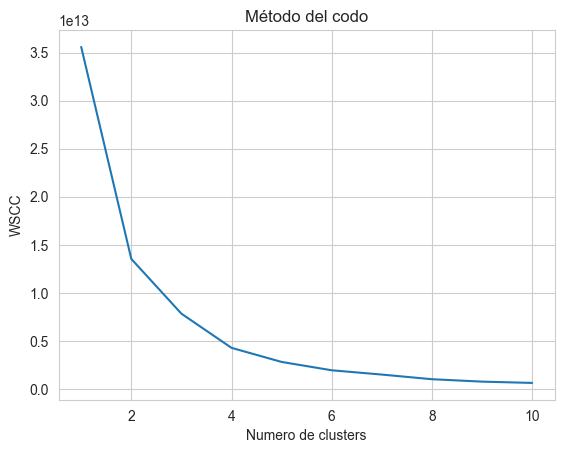

In [37]:
plt.plot(range(1,11), wscc)
plt.title("Método del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

In [38]:
clustering = KMeans(n_clusters = 3, max_iter = 300) #Creamos el modelo
clustering.fit(df_clean_encoded) #Aplica el modelo a los datos

KMeans(n_clusters=3)

In [39]:
from sklearn.metrics import silhouette_score
# Número de clusters
n_clusters = 3

# Inicializando el algoritmo K-Means con 3 clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(df_clean_encoded)

# Calculando el puntaje de silueta para 3 clusters
silhouette_avg = silhouette_score(df_clean_encoded, cluster_labels)

print(f"Para n_clusters = {n_clusters}, el promedio del coeficiente de silueta es: {silhouette_avg}")

Para n_clusters = 3, el promedio del coeficiente de silueta es: 0.6232177787452744


In [40]:
df_clean['KMeans_Cluster'] = clustering.labels_ 
#Los resultados del clustering se guardan en labels_ dentro del modelo

df_clean.head()

,Rank,Title,Description,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3,Actor4,KMeans_Cluster
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,Unknown,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,0
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,0
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis,1


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #Grafico de dos dimensiones
pca_movies = pca.fit_transform(df_clean_encoded) #Obtenemos los componentes principales
pca_movies_df = pd.DataFrame(data = pca_movies, columns = ["Componente_1", "Componente_2"])
pca_nombres_movies = pd.concat([pca_movies_df, df_clean[['KMeans_Cluster']]], axis = 1)
#Asignamos colores a los puntos en base al cluster al que pertenecen

pca_nombres_movies.head()

,Componente_1,Componente_2,KMeans_Cluster
0,587265.958595,246.098422,2
1,316011.930638,359.300312,2
2,-12202.017269,504.561287,0
3,-109262.960187,550.713123,0
4,223919.007595,403.238019,1


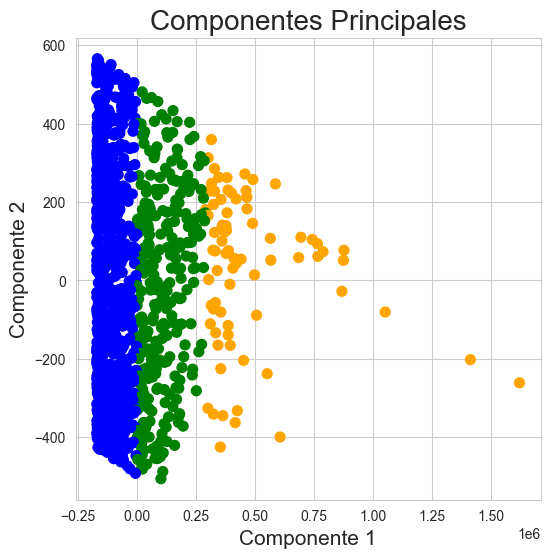

In [42]:
fig = plt.figure(figsize = (6,6)) #Creamos figura de tamaño 6x6

ax = fig.add_subplot(1,1,1) #Le indico que solo creare un grafico en la figura
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales", fontsize = 20)

color_theme = np.array(['blue', 'green', 'orange'])

ax.scatter(x = pca_nombres_movies.Componente_1, y = pca_nombres_movies.Componente_2,
          c = color_theme[pca_nombres_movies.KMeans_Cluster], s=50)

In [47]:
df_clean.to_csv("dataCluster2.csv")

# Proyecto parte 2

# Importas lo necesario

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos data

In [49]:
# Load the data
df = pd.read_csv('IMDB-Movie-Data.csv')

# Quitamos nulos y limpiamos data

In [50]:
# Separate features and target variable
X = df.drop(['Description', 'Title'], axis=1)
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
numeric_features = [col for col in df.columns if col not in categorical_features + ['Revenue (Millions)']]

# Adding polynomial features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Handle missing values in the target column
y = df['Revenue (Millions)'].values.reshape(-1, 1)
y = SimpleImputer(strategy='most_frequent').fit_transform(y).ravel()

X = df.drop('Revenue (Millions)', axis=1)

# Separamos prueba y entrenamiento

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos los 3 modelos 

In [52]:
# Define the models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(),
    "Linear Regression": LinearRegression(),
}

# Hyperparameters for tuning
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
}

param_grid_svm = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}


# Entrenamos modelos y hacemos la nueva columna y sacamos matrices

Random Forest - MAE: 38.744454701898576, MSE: 4534.268309468408, RMSE: 67.33697579687113, MAPE: 9204.947929421971, R2: 0.5568600932099148


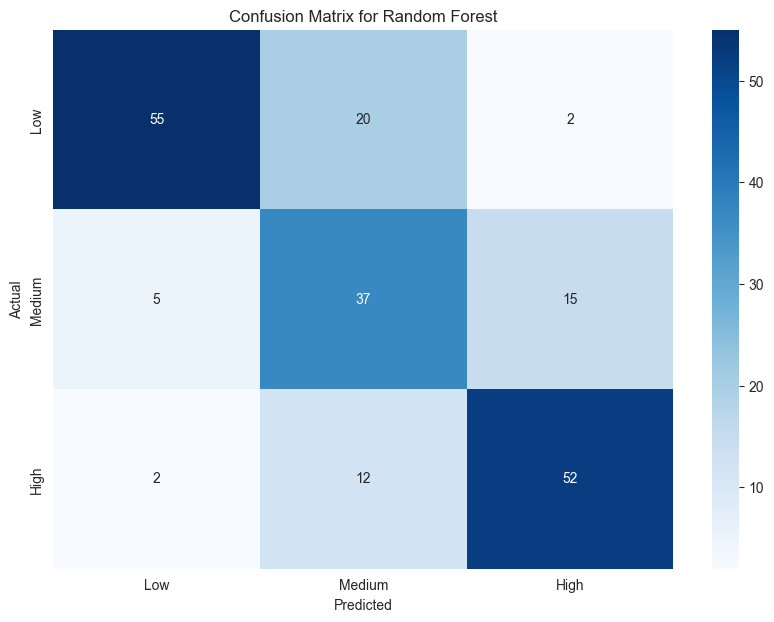

Classification Report for Random Forest:
              precision    recall  f1-score   support

         Low       0.75      0.79      0.77        66
      Medium       0.89      0.71      0.79        77
        High       0.54      0.65      0.59        57

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.74      0.72      0.73       200

SVM - MAE: 39.43147760439113, MSE: 4677.005936350044, RMSE: 68.388638942079, MAPE: 8770.10747322437, R2: 0.5429101603090138


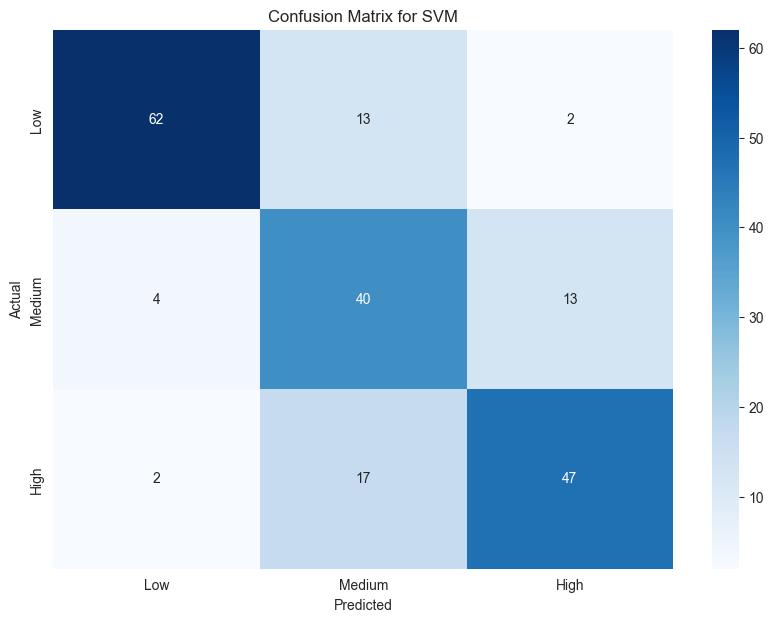

Classification Report for SVM:
              precision    recall  f1-score   support

         Low       0.76      0.71      0.73        66
      Medium       0.91      0.81      0.86        77
        High       0.57      0.70      0.63        57

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.76      0.74      0.75       200

Linear Regression - MAE: 38.73809139744471, MSE: 3442.974023914162, RMSE: 58.67686106050802, MAPE: 14966.43849183058, R2: 0.6635136952852974


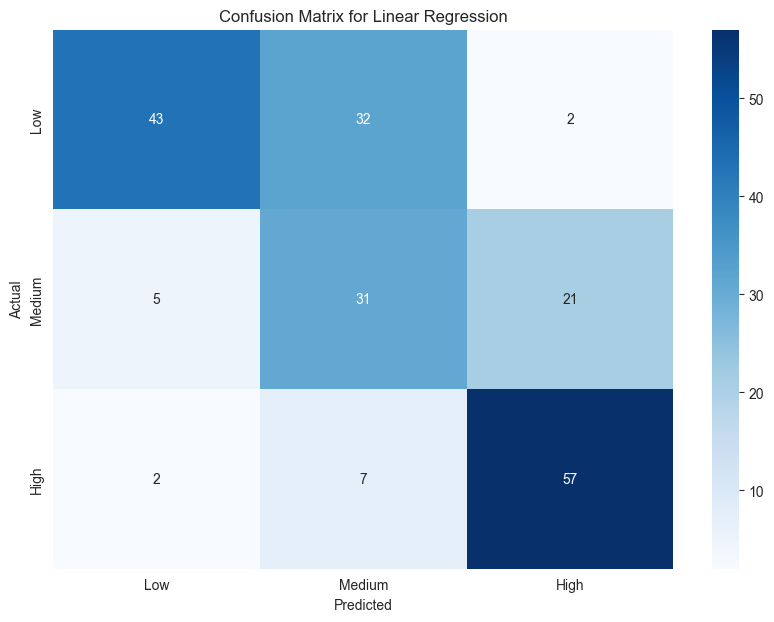

Classification Report for Linear Regression:
              precision    recall  f1-score   support

         Low       0.71      0.86      0.78        66
      Medium       0.86      0.56      0.68        77
        High       0.44      0.54      0.49        57

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.65       200
weighted avg       0.69      0.66      0.66       200



In [53]:
# Dictionary to store the evaluation metrics of each model
evaluation_metrics = {}

# Define thresholds for low, medium, high revenue categories
low_threshold = np.percentile(y_train, 33)
high_threshold = np.percentile(y_train, 67)

# Function to categorize revenue
def categorize_revenue(revenue):
    if revenue <= low_threshold:
        return 'Low'
    elif revenue <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Train and evaluate each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Hyperparameter tuning
    if model_name == "Random Forest":
        grid_search = GridSearchCV(pipeline, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    elif model_name == "SVM":
        grid_search = GridSearchCV(pipeline, param_grid_svm, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    else:
        grid_search = None
    
    if grid_search:
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
    else:
        best_pipeline = pipeline.fit(X_train, y_train)
    
    y_pred = best_pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    evaluation_metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

    # Print evaluation metrics
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

    # Categorize actual and predicted values
    y_test_categories = [categorize_revenue(y) for y in y_test]
    y_pred_categories = [categorize_revenue(y) for y in y_pred]

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test_categories, y_pred_categories, labels=['Low', 'Medium', 'High'])
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Low', 'Medium', 'High'], columns=['Low', 'Medium', 'High'])

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_categories, y_pred_categories, target_names=['Low', 'Medium', 'High']))


# Determinamos el mejor modelo

In [54]:
# Determine the best model
best_model_name = min(evaluation_metrics, key=lambda x: evaluation_metrics[x]['MSE'])
print(f'\nThe best model is {best_model_name} with the following metrics:')
for metric, value in evaluation_metrics[best_model_name].items():
    print(f'{metric}: {value}')



The best model is Linear Regression with the following metrics:
MAE: 38.73809139744471
MSE: 3442.974023914162
RMSE: 58.67686106050802
MAPE: 14966.43849183058
R2: 0.6635136952852974
